# Reproducing previous results

The purpose of this laptop is to make sure that the results of previos work by [Hallerberg et al.](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.80.026124) are reproduced.

## P(X=1|y)
Let's make sure that the graphs of conditional distributions are similar.

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
os.chdir("../")

import sys
sys.path.insert(1, 'src/')
import abel_heap
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = 22
plt.rcParams['axes.labelpad'] = 20

In [7]:
get_eta_determ = lambda L, percent: int(L * (L+1) * (L+2) // 6 * percent)
get_a = lambda T: np.exp(-1. / T)

PERCENTS_ETA = [0.01, 0.02, 0.05, 0.10, 0.15, 0.25, 0.30]
LS = [64, 128, 256]
TS = [225, 450, 900]

args = []
for L, T in zip(LS, TS):
    A = get_a(T)
    for percent in PERCENTS_ETA:
        model = "determ"
        ETA = get_eta_determ(L, percent)
        args.append((L, ETA, A, model))

conditional_probability = abel_heap.calculate_conditional_probability_parallel(args, K_BINS=200, use_cache=True, njobs=-1)

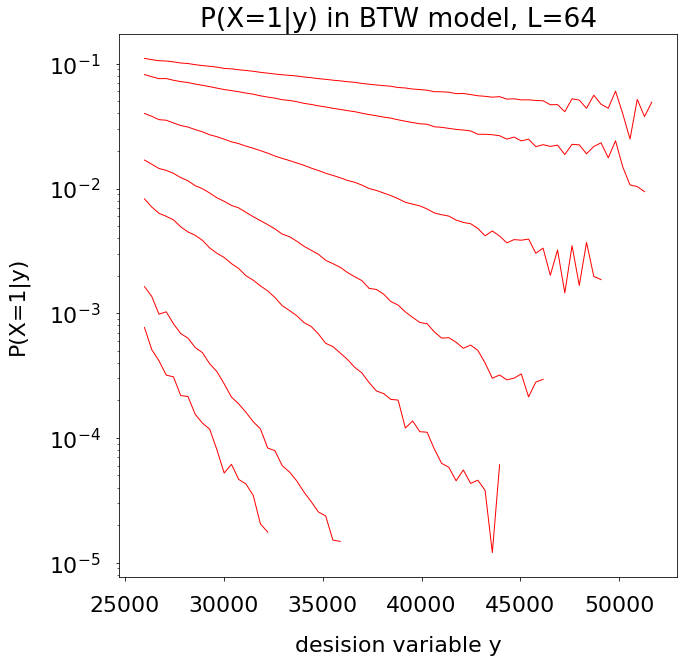

In [8]:
for _, row in conditional_probability.iterrows():
    if row["L"] != 64:
        continue
    bins, cond_prob = row["results"]
    trunc_idx = -1
    
    bins = bins[20:]
    cond_prob = cond_prob[20:]
    
    for i in range(len(bins)):
        if cond_prob[i] < 1e-5:
            trunc_idx = i - 1
            break
    
    bins = bins[:trunc_idx]
    cond_prob = cond_prob[:trunc_idx]
    
    L = row["L"]
    ETA = row["ETA"]
    A = row["A"]
    plt.plot(bins, cond_prob, color="r", linewidth=1)

plt.title("P(X=1|y) in BTW model, L=64")
plt.yscale("log")
plt.xlabel("desision variable y")
plt.ylabel("P(X=1|y)")
plt.show()

**Conclusions:** yes, they are similar.

## ROC-curve
Let's make sure that the graphs ROC-curve are similar.

In [9]:
auc = abel_heap.calculate_roc_curve_parallel(args, K_BINS=200, use_cache=True, njobs=-1)

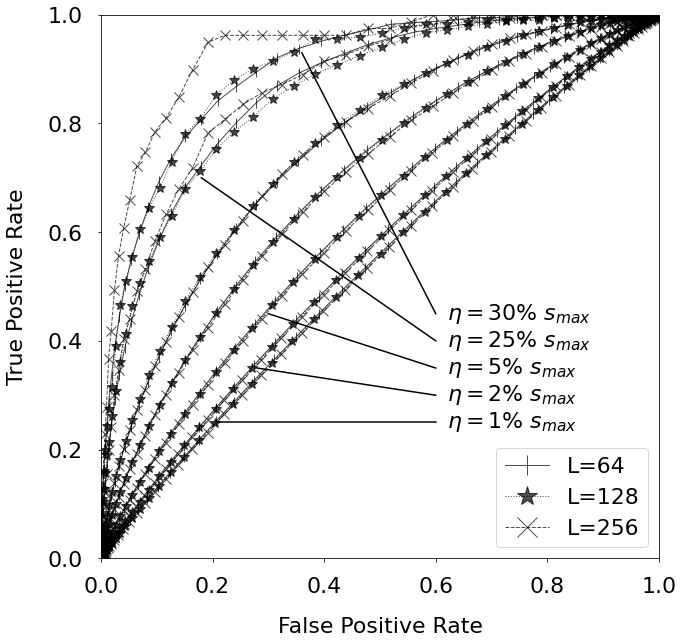

In [10]:
plt.rcParams['xtick.minor.pad'] = 15
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['ytick.minor.pad'] = 15
plt.rcParams['ytick.major.pad'] = 15

used = set()

for _, row in auc.iterrows():
    L = row["L"]
    ETA = row["ETA"]
    A = row["A"]
    
    if L == 64:
        marker = "|"
        linestyle = "solid"
    elif L == 128:
        marker = "*"
        linestyle = "dotted"
    else:
        marker = "x"
        linestyle = "dashed"
        
    if L in used:
        label = None
    else:
        label = f"L={L}"
        used.add(L)
    
    fpr, tpr, thresholds = row["results"]
    
    plt.plot(fpr, tpr, marker=marker, linestyle=linestyle, color="black", linewidth=1, markersize=10, alpha=0.7, label=label)
    
point1 = [0.21, 0.25]
point2 = [0.6, 0.25]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color="black")
plt.text(point2[0]+0.02, point2[1]-0.01, "$\eta = 1\%\ s_{max}$")

point1 = [0.28, 0.35]
point2 = [0.6, 0.30]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color="black")
plt.text(point2[0]+0.02, point2[1]-0.01, "$\eta = 2\%\ s_{max}$")

point1 = [0.3, 0.45]
point2 = [0.6, 0.35]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color="black")
plt.text(point2[0]+0.02, point2[1]-0.01, "$\eta = 5\%\ s_{max}$")

point1 = [0.18, 0.7]
point2 = [0.6, 0.4]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color="black")
plt.text(point2[0]+0.02, point2[1]-0.01, "$\eta = 25\%\ s_{max}$")

point1 = [0.36, 0.93]
point2 = [0.6, 0.45]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color="black")
plt.text(point2[0]+0.02, point2[1]-0.01, "$\eta = 30\%\ s_{max}$")

# plt.title("ROC curves")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(markerscale=2)
plt.show()

**Conclusions**: yes, they are similar.